In [19]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy
from scipy import signal

Text(0, 0.5, 'magnitude')

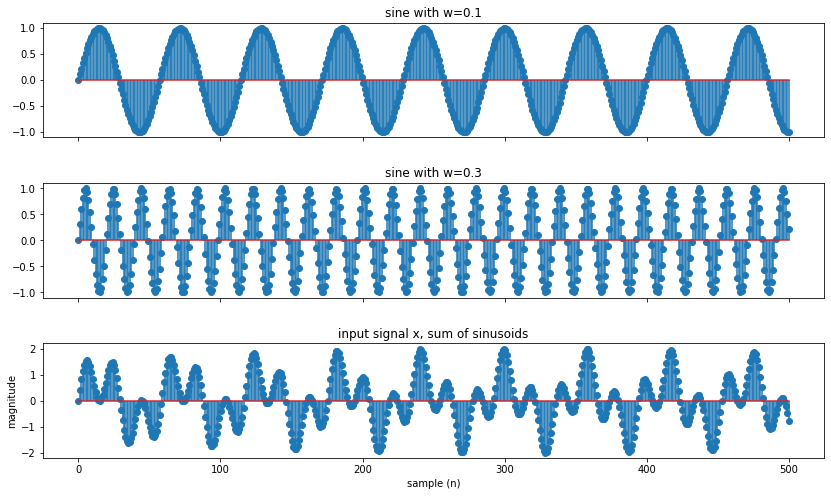

In [20]:
# indexing and input definition

T = 500        # duration of input signal (T samples)
k = 8          # N to the kth power
N = 2**k       # desired length of zero padded input signal, N-point FFT
# make sure N is sufficiently larger than T
while T*1.5 > N:
    k = k + 1
    N = 2**k

fs = 1           # sampling freq
Ts = 1/fs        # delta t
ws = 2*np.pi*fs  # sampling freq (rad)

# zero pad
C = int((N-T)/2)        # index t = 0
D = C + T               # index at t = T
n = np.linspace(0,T,T)
n_pad = np.linspace(0,N,N)

# frequency in radians for input sines 
wa = 0.11
wb = 0.32

# define input signal
# random values
ran = np.zeros(N)
ran[C:D] = random.rand(T)
ran_title = 'random values [0,1]'
# sinusoid
sinx = np.zeros(N)
sin1 = np.sin(wa*Ts*n)
sin2 = np.sin(wb*Ts*n)
sinx[C:D] = sin1 + sin2
sinx_title = 'sum of sinusoids'

# choose which input signal to analyze
x = sinx
sig_title = sinx_title

# plot input signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8), sharex=True)
plt.subplots_adjust(hspace=.4)      # leave space between subplots

ax1.stem(n,sin1)
ax1.set_title('sine with w=%.1f' % wa)

ax2.stem(n,sin2)
ax2.set_title('sine with w=%.1f' % wb)

ax3.stem(n,x[C:D])
ax3.set_title('input signal x, %s' % sig_title)
ax3.set_xlabel('sample (n)')
ax3.set_ylabel('magnitude')

Text(0.5, 1.0, 'impulse response')

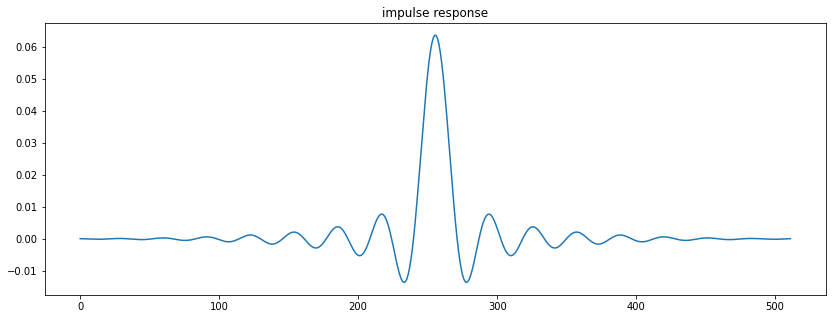

In [21]:
# define FIR
wc1 = 0.2/(2*np.pi)       # normalized cutoff freq
L = N//2                  # length of filter window
h = signal.firwin(L,cutoff=wc1,window='hamming',pass_zero='lowpass',fs=fs)

# make non-negative (don't need for normal usage, breaks some impulse responses):
#H = scipy.fft.fft(h)
#H = np.convolve(H,H,'same')
#h = np.abs(scipy.fft.ifft(H))

# normalize:
h = h * 1/sum(h)

# plot
fig= plt.figure(figsize=(14,5))
plt.plot(range(L),h)
plt.title('impulse response')

Text(0.5, 0, 'w (0 to pi)')

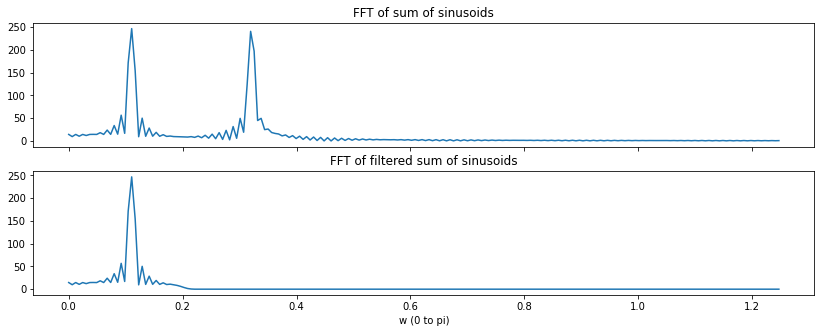

In [22]:
# apply filtering

# convolve impulse
y = np.convolve(x,h,'same')

# fft original
Y0 = np.abs(scipy.fft.fft(x))

# fft filtered
Y1 = np.abs(scipy.fft.fft(y))

# plot
# define freq bins
w = np.linspace(0, 2*np.pi, N)
plot_len = N//5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,5), sharex=True)

#Y0_db = 20*np.log10(Y0[:plot_len])
#Y1_db = 20*np.log10(Y1[:plot_len])

ax1.plot(w[:plot_len],Y0[:plot_len])
#ax1.plot(w,Y0)
ax1.set_title('FFT of %s' % sig_title)
#ax1.set_xlabel('w (0 to pi)')
#ax1.set_ylabel('magnitude (dB)')

ax2.plot(w[:plot_len],Y1[:plot_len])
#ax2.plot(w,Y1)
ax2.set_title('FFT of filtered %s' % sig_title)
ax2.set_xlabel('w (0 to pi)')
#ax2.set_ylabel('magnitude (dB)')


Text(0.5, 1.0, 'filtered signal y')

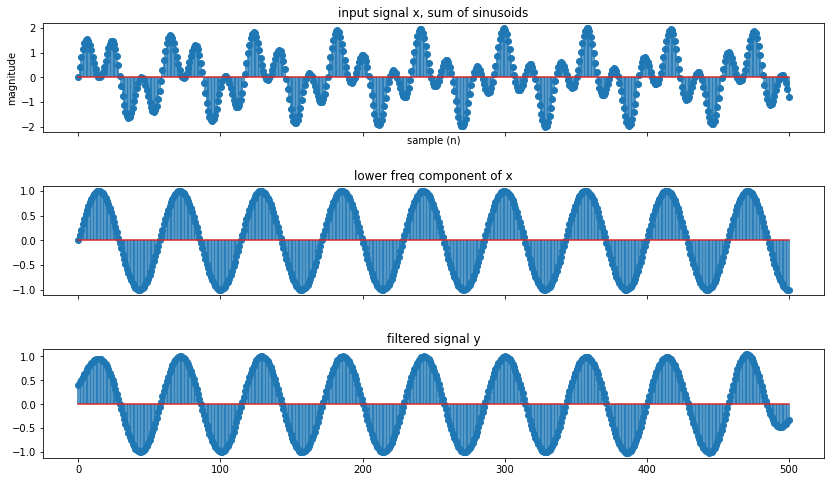

In [23]:
# plot waveforms

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(14,8),sharex=True)
plt.subplots_adjust(hspace=.5)

ax1.stem(n,x[C:D])
ax1.set_title('input signal x, %s' % sig_title)
ax1.set_xlabel('sample (n)')
ax1.set_ylabel('magnitude')

ax2.stem(n,sin1)
ax2.set_title('lower freq component of x')

ax3.stem(n,y[C:D])
ax3.set_title('filtered signal y')

In [24]:
len(Y0)

1024